In [1]:
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm 
warnings.filterwarnings("ignore")

# Data loading

In [2]:
data = pd.read_csv("../data/raw/ml-100k/u.data", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
data

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
GENRES = ["unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
OCCUPATIONS = ["administrator", "artist", "doctor", "educator", "engineer", "entertainment", "executive", "healthcare", "homemaker", "lawyer", 
               "librarian" ,"marketing" ,"none" ,"other" ,"programmer" ,"retired" ,"salesman" ,"scientist" ,"student" ,"technician" ,"writer"]

In [4]:
items = pd.read_csv("../data/raw/ml-100k/u.item", sep='|', header=None, names=["movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], encoding='ISO-8859-1')
items

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
items = items.drop(columns=['video_release_date'])
items

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
items.shape

(1682, 23)

In [7]:
users = pd.read_csv("../data/raw/ml-100k/u.user", sep='|', header=None, names=["user_id", "age", "gender", "occupation", "zip_code"], encoding='ISO-8859-1')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# Data preprocessing

In [8]:
import ctypes

def my_hash(x):
  return ctypes.c_size_t(hash(x)).value

def users_encode(users):
  users_enc = users.copy()
  users_enc["age"] = users['age']/100
  users_enc["gender"] = (users['gender']=='M').astype(int)
  users_enc["zip_code"] = users["zip_code"].apply(my_hash)
  max_zip = users_enc["zip_code"].max()
  users_enc["zip_code"] = users_enc["zip_code"]/max_zip
  users_enc = pd.concat([users_enc.drop('occupation', axis=1), pd.get_dummies(users_enc['occupation'], dtype=float)], axis=1)
  users_enc = users_enc.drop(columns=["other"])
  return users_enc


def calculate_genre_ratio(user_id, data, items):
  movies_set = set(data[data["user_id"] == user_id]["movie_id"].tolist())
  genres_sum = items[items["movie_id"].isin(movies_set)].iloc[:, 4:].sum(axis=0).to_numpy()
  return genres_sum/genres_sum.sum()

def encode_users(users, data, items):
  users_enc = users_encode(users)
  # users_enc[[name for name in GENRES]] = users_enc["user_id"].apply(lambda x: calculate_genre_ratio(x, data, items)).tolist()
  return users_enc

In [9]:
def encode_top_films(user_id, top_films):
  arr = top_films[top_films['user_id']==user_id]["movie_ids"].item()
  # print(arr.item())
  arr = [x/1682 for x in arr]
  return arr

def get_users_fav_films(users, data, n):
  users = users.copy()
  top_films = data.set_index('movie_id').groupby('user_id')['rating'].nlargest(n).reset_index().groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movie_ids')

  target = top_films
  for i in range(1682):
      target[f"{i+1}"] = 0
  
  for i, row in target.iterrows():
      for elem in row['movie_ids']:
          target.at[i, f"{elem}"] = 1
  # print(target)

  # users[[f"top_{name+1}" for name in range(n)]] = users["user_id"].apply(lambda x: encode_top_films(x, top_films)).tolist()
  # return users
  return pd.concat([users, target.drop(columns=['user_id'])], axis=1).drop(columns=['movie_ids']), target['movie_ids'] #DON"T FORGET TO SUBTRACT 1

In [10]:
tt = data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movies') 
tt['len'] = tt['movies'].apply(len)
tt

,user_id,movies,len
0,1,"[61, 189, 33, 160, 20, 202, 171, 265, 155, 117...",272
1,2,"[292, 251, 50, 314, 297, 290, 312, 281, 13, 28...",62
2,3,"[335, 245, 337, 343, 323, 331, 294, 332, 328, ...",54
3,4,"[264, 303, 361, 357, 260, 356, 294, 288, 50, 3...",24
4,5,"[2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1...",175
...,...,...,...
938,939,"[931, 106, 258, 1054, 689, 476, 409, 121, 1190...",49
939,940,"[193, 568, 14, 205, 272, 655, 315, 66, 873, 28...",107
940,941,"[147, 124, 117, 181, 993, 258, 7, 475, 257, 15...",22
941,942,"[117, 200, 604, 423, 261, 427, 487, 323, 615, ...",79


In [11]:
tt['len'].median()

65.0

In [12]:
import warnings
warnings.filterwarnings("ignore")

def build_target(data):
    target = data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movies') 
    for i in range(1682):
        target[f"{i+1}"] = 0
    
    for i, row in target.iterrows():
        for elem in row['movies']:
            target.at[i, f"{elem}"] = 1
    return target

In [13]:
def build_dataset(users, items, data):
    dataset = encode_users(users, data, items)
    final_dataset, masks = get_users_fav_films(dataset, data, 10)
    final_dataset = final_dataset.drop(columns=["user_id"])
    target = build_target(data)
    final_target = target.drop(columns=["user_id", "movies"])
    return final_dataset, final_target, target['movies'].to_list(), masks

data = pd.read_csv("../data/raw/ml-100k/u.data", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
dataset, targets, idx_lists, masks_list = build_dataset(users, items, data)

In [14]:
dataset

,age,gender,zip_code,administrator,artist,doctor,educator,engineer,entertainment,executive,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.24,1,0.755483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.53,0,0.822173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.23,1,0.491834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.24,1,0.676954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.33,0,0.403568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.26,0,0.968967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
939,0.32,1,0.281022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
940,0.20,1,0.394386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
941,0.48,0,0.338003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.5 
SEED = 177013

train_dataset = dataset.sample(frac=TRAIN_RATIO, random_state=SEED)
val_dataset = dataset.drop(train_dataset.index).sample(frac=VAL_RATIO, random_state=SEED)
test_dataset = dataset.drop(train_dataset.index).drop(val_dataset.index)

train_targets = targets.sample(frac=TRAIN_RATIO, random_state=SEED)
val_targets = targets.drop(train_targets.index).sample(frac=VAL_RATIO, random_state=SEED)
test_targets = targets.drop(train_targets.index).drop(val_targets.index)

train_masks = masks_list.sample(frac=TRAIN_RATIO, random_state=SEED)
val_masks = masks_list.drop(train_masks.index).sample(frac=VAL_RATIO, random_state=SEED)
test_masks = masks_list.drop(train_masks.index).drop(val_masks.index)

print(f"{len(train_dataset)=}")
print(f"{len(val_dataset)=}")
print(f"{len(test_dataset)=}")

len(train_dataset)=566
len(val_dataset)=188
len(test_dataset)=189


# Model

In [16]:
import torch

In [17]:
device = "cuda"  if torch.cuda.is_available() else 'cpu'

In [18]:
X_train = torch.Tensor(train_dataset.values).to(device)
Y_train = torch.Tensor(train_targets.values).to(device)
X_val = torch.Tensor(val_dataset.values).to(device)
Y_val = torch.Tensor(val_targets.values).to(device)
X_test = torch.Tensor(test_dataset.values).to(device)
Y_test = torch.Tensor(test_targets.values).to(device)

In [19]:
len(X_train[0])

1705

In [20]:
from torch import nn 
import torch.nn.functional as F

class RecSys(nn.Module):
    def __init__(
        self
    ):
        super(RecSys, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1705, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU()
        )
        self.head = nn.Sequential(
            nn.Linear(2048, 1682)
        )

    def forward(self, x):
        deep_logits = self.linear_relu_stack(x)
        total_logits = self.head(deep_logits)
        return F.sigmoid(total_logits)

In [21]:
model = RecSys().to(device)

In [22]:
def build_mask(size, offset, indexes):
    mask = [True for _ in range(size)]
    for elem in indexes:
        mask[elem+offset-1] = False
    return torch.tensor(mask)

In [23]:
def mask_target(target, masks):
    masked = []
    for i in range(len(target)):
        elem = target[i]
        mask = build_mask(len(elem), 0, masks[i]).to(device)
        masked_elem =  torch.masked_select(elem, mask)
        masked.append(masked_elem)
    return torch.stack(masked)

def mask_one_row(target, mask):
    torch_mask = build_mask(len(target), 0, mask).to(device)
    return torch.masked_select(target, torch_mask)

Y_train_masked  = mask_target(Y_train, train_masks.to_list())
Y_val_masked = mask_target(Y_val, val_masks.to_list())
Y_test_masked = mask_target(Y_test, test_masks.to_list())

In [24]:
from tqdm import trange

EPOCHS = 500
SAVE_STEP = 5
loss_fn = nn.BCELoss()#nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
best_score = 999999
best_epoch = 0

t = trange(EPOCHS)
for i in t:
    
    model.train()
    pred_train = model(X_train)
    masked_pred_train = mask_target(pred_train, train_masks.to_list())
    loss_train = loss_fn(masked_pred_train, Y_train_masked)
    
    # Backpropagation
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        pred_val = model(X_val)
        masked_pred_val = mask_target(pred_val, val_masks.to_list())
        loss_val = loss_fn(masked_pred_val, Y_val_masked)
        if loss_val < best_score:
            best_score = loss_val
            best_epoch = i+1
            torch.save(model, "../models/best_model")
    
    t.set_description(f"Train loss: {loss_train:>7f}\tVal loss: {loss_val:>7f}\tLowest val loss: {best_score:>7f}", refresh=True)
    if (i+1) % SAVE_STEP == 0:
        torch.save(model, f"../models/checkpoint_{i+1}_model")
torch.save(model, "../models/latest_model")

Train loss: 0.005273\Val loss: 0.753357	Lowest val loss: 0.167166: 100%|██████████| 500/500 [04:01<00:00,  2.07it/s]


In [25]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # if not actual:
    #     return 0.0
    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [26]:
def evaluate_model(model, K=[5, 10, 20, 50], show = True):
    actuals = []
    predictions = []
    for i in range(len(Y_val)):
        probs = model(X_val[i])
        probs = mask_one_row(probs, val_masks.to_list()[i])
        temp = probs.detach().cpu().numpy()
        act = Y_val_masked[i].detach().cpu().numpy()
        actuals.append(np.argsort(act)[len(act)-int(sum(act)):])
        predictions.append(np.argsort(temp)[::-1])    
    
    ans = []
    for k in K:
        elem = mapk(actuals, predictions, k)
        ans.append(elem)
        if show:
            print(f"K={k}\tMAP@K: {elem}")
    return ans


model = torch.load("../models/best_model").to(device)
best_model_metrics = evaluate_model(model)

K=5	MAP@K: 0.5029609929078014
K=10	MAP@K: 0.43106235224586287
K=20	MAP@K: 0.37448776926138294
K=50	MAP@K: 0.3162504436128433


In [27]:
model = torch.load("../models/latest_model").to(device)
evaluate_model(model)

K=5	MAP@K: 0.3878368794326242
K=10	MAP@K: 0.31640535292131033
K=20	MAP@K: 0.26786271063372186
K=50	MAP@K: 0.23318681897355897


[0.3878368794326242,
 0.31640535292131033,
 0.26786271063372186,
 0.23318681897355897]

In [28]:
metrics = []
steps = []
for i in range(SAVE_STEP, EPOCHS+SAVE_STEP, SAVE_STEP):
    steps.append(i)
    model = torch.load(f"../models/checkpoint_{i}_model").to(device)
    metrics.append(evaluate_model(model, show = False))

FileNotFoundError: [Errno 2] No such file or directory: './reports/figures/validation.png'

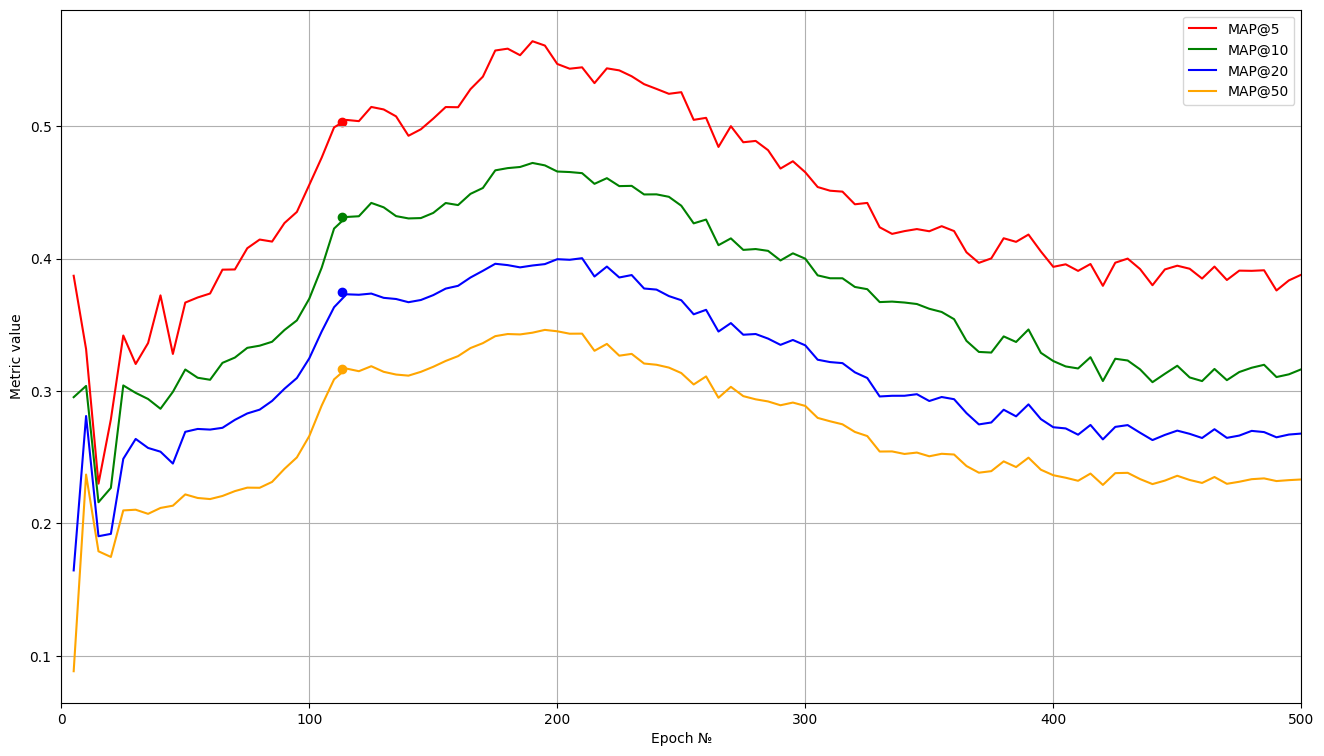

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
map_5 = [x[0] for x in metrics]
map_10 = [x[1] for x in metrics]
map_20 = [x[2] for x in metrics]
map_50 = [x[3] for x in metrics]
ax.plot(steps, map_5, label = "MAP@5", color='r')
ax.plot(steps, map_10, label = "MAP@10", color='g')
ax.plot(steps, map_20, label = "MAP@20", color='b')
ax.plot(steps, map_50, label = "MAP@50", color='orange')

ax.scatter(best_epoch, best_model_metrics[0], color='r')
ax.scatter(best_epoch, best_model_metrics[1], color='g')
ax.scatter(best_epoch, best_model_metrics[2], color='b')
ax.scatter(best_epoch, best_model_metrics[3], color='orange')

plt.xlim([0, steps[-1]])
plt.xlabel("Epoch №")
plt.ylabel("Metric value")
plt.legend()
plt.grid()
plt.show()